<a href="https://colab.research.google.com/github/kwnnag/HOMEWORK-GKIKA/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_%CF%84%CE%B5%CE%BB%CE%B9%CE%BA%CE%AE_%CE%B5%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_2024_%CE%A0%CE%B1%CE%BD%CE%B1%CE%B8%CE%B7%CE%BD%CE%B1%CF%8A%CE%BA%CF%8C%CF%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!python -m spacy download el_core_news_sm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Panathinaikos report.xlsx")

In [ ]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df=df.drop_duplicates(subset=["title"])

In [ ]:
df.head()

,index,type,source,title,text,categories,sentiment,date,time,link
0,0,web,xiakoslaos.gr,Μιλουτίνοφ: «Όταν είσαι στο Final-4 δεν είναι ...,"Μετά το τέλος της αναμέτρησης με το Περιστέρι,...",EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-06-01,23:59:00,https://www.xiakoslaos.gr/athlitika/324446/mil...
2,2,web,gazzetta.gr,Μπράουν: «Σκοεπύω να μείνω στη Μακάμπι»,Σπύρος Μαρκεζίνης\nΟ Λορέντζο Μπράουν σε πρόσφ...,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-06-01,23:54:31,https://www.gazzetta.gr/basketball/euroleague/...
3,3,web,tempo24.news,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,Ο Νίκολα Μιλουτίνοφ μίλησε για την παρουσία το...,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-06-01,23:43:00,https://tempo24.news/eidisi/483626/miloytinof-...
4,4,web,newspao.gr,Παναθηναϊκός: Επιτυχία της ΚΑΕ - Πρόλαβε τις.....,Στις αρχές του 2024 η ΚΑΕ Παναθηναϊκός φρόντισ...,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-06-01,23:19:23,https://newspao.gr/basket/575890_panathinaikos...
5,5,web,makeleio.gr,ΠΟΙΟΣ ΕΛ ΚΑΑΜΠΙ!!! Το… σήκωσε ο Κούλης – Ποδοσ...,"Ο Παναθηναϊκός AKTOR πήρε την Euroleague, ο Ολ...",EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-06-01,23:05:37,https://www.makeleio.gr/%ce%b5%cf%80%ce%b9%ce%...


In [ ]:
df.tail()

,index,type,source,title,text,categories,sentiment,date,time,link
4979,4995,web,protothema.gr,Αταμάν για τη νίκη του ΠΑΟ επί της Φενέρ: Παίξ...,Euroleague\nΠαναθηναϊκός\nΕργκίν Αταμάν\nΟ προ...,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-05-25,01:15:50,https://www.protothema.gr/sports/article/15015...
4980,4996,web,sport24.gr,Ο Παναθηναϊκός έκανε τη Φενέρ μια χαψιά και ο ...,Ο Παναθηναϊκός AKTOR στραγγάλισε στην τελευταί...,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-05-25,01:14:55,https://www.sport24.gr/opinions/vasilis-skoynt...
4981,4997,web,gazzetta.gr,Μήτογλου στο Gazzetta: «Μια νίκη για να ολοκλη...,Γιώργος Κούβαρης\nΟ Παναθηναϊκός AKTOR θα έχει...,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Neutral,2024-05-25,01:13:52,https://www.gazzetta.gr/basketball/euroleague/...
4982,4998,web,newpost.gr,Μάχη «Τιτάνων» ανάμεσα σε Παναθηναϊκό και Ρεάλ...,"Ο\nΠαναθηναϊκός\nτου Εργκίν Αταμάν, παίζοντας ...",EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Neutral,2024-05-25,01:13:23,https://newpost.gr/eidiseis/machi-titanon-anam...
4983,4999,web,realvoice995.gr,"Φόβος και τρόμος ο Παναθηναϊκός, ρεσιτάλ Αταμά...",1\nΈνας επιβλητικός Παναθηναϊκός έκανε… σκόνη ...,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-05-25,01:13:01,https://realvoice995.gr/fovos-kai-tromos-o-pan...


In [ ]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df=df.drop_duplicates(subset=["title"])

In [ ]:
len(df)

3898

In [ ]:
df.head(1)

,level_0,index,type,source,title,text,categories,sentiment,date,time,link
0,0,0,web,xiakoslaos.gr,Μιλουτίνοφ: «Όταν είσαι στο Final-4 δεν είναι ...,"Μετά το τέλος της αναμέτρησης με το Περιστέρι,...",EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-06-01,23:59:00,https://www.xiakoslaos.gr/athlitika/324446/mil...


In [ ]:
df.tail(1)

,level_0,index,type,source,title,text,categories,sentiment,date,time,link
3897,4983,4999,web,realvoice995.gr,"Φόβος και τρόμος ο Παναθηναϊκός, ρεσιτάλ Αταμά...",1\nΈνας επιβλητικός Παναθηναϊκός έκανε… σκόνη ...,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-05-25,01:13:01,https://realvoice995.gr/fovos-kai-tromos-o-pan...


In [ ]:
df.describe()


,level_0,index
count,3898.000000,3898.000000
mean,2478.116470,2484.955875
std,1436.615389,1440.846560
min,0.000000,0.000000
25%,1233.500000,1237.500000
50%,2459.000000,2464.000000
75%,3689.750000,3700.750000
max,4983.000000,4999.000000


In [ ]:
df["text"] = df["title"] + " " + df["text"]

In [ ]:
df["datetime"] = df["date"] + " " + df["time"]
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df["year"] = pd.DatetimeIndex(df["datetime"]).year

df["month"]= pd.DatetimeIndex(df["datetime"]).month

df["day"]= pd.DatetimeIndex(df["datetime"]).day

df["hour"]= pd.DatetimeIndex(df["datetime"]).hour

In [ ]:
hourly_counts = df.groupby('hour').size().reset_index(name='count')

In [ ]:
hourly_counts

,hour,count
0,0,225
1,1,94
2,2,51
3,3,31
4,4,21
5,5,11
6,6,30
7,7,93
8,8,154
9,9,206


In [ ]:
df.columns

Index(['level_0', 'index', 'type', 'source', 'title', 'text', 'categories',
       'sentiment', 'date', 'time', 'link', 'datetime', 'year', 'month', 'day',
       'hour'],
      dtype='object')

In [ ]:
df

,level_0,index,type,source,title,text,categories,sentiment,date,time,link,datetime,year,month,day,hour
0,0,0,web,xiakoslaos.gr,Μιλουτίνοφ: «Όταν είσαι στο Final-4 δεν είναι ...,Μιλουτίνοφ: «Όταν είσαι στο Final-4 δεν είναι ...,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-06-01,23:59:00,https://www.xiakoslaos.gr/athlitika/324446/mil...,2024-06-01 23:59:00,2024,6,1,23
1,2,2,web,gazzetta.gr,Μπράουν: «Σκοεπύω να μείνω στη Μακάμπι»,Μπράουν: «Σκοεπύω να μείνω στη Μακάμπι» Σπύρος...,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-06-01,23:54:31,https://www.gazzetta.gr/basketball/euroleague/...,2024-06-01 23:54:31,2024,6,1,23
2,3,3,web,tempo24.news,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-06-01,23:43:00,https://tempo24.news/eidisi/483626/miloytinof-...,2024-06-01 23:43:00,2024,6,1,23
3,4,4,web,newspao.gr,Παναθηναϊκός: Επιτυχία της ΚΑΕ - Πρόλαβε τις.....,Παναθηναϊκός: Επιτυχία της ΚΑΕ - Πρόλαβε τις.....,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-06-01,23:19:23,https://newspao.gr/basket/575890_panathinaikos...,2024-06-01 23:19:23,2024,6,1,23
4,5,5,web,makeleio.gr,ΠΟΙΟΣ ΕΛ ΚΑΑΜΠΙ!!! Το… σήκωσε ο Κούλης – Ποδοσ...,ΠΟΙΟΣ ΕΛ ΚΑΑΜΠΙ!!! Το… σήκωσε ο Κούλης – Ποδοσ...,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-06-01,23:05:37,https://www.makeleio.gr/%ce%b5%cf%80%ce%b9%ce%...,2024-06-01 23:05:37,2024,6,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,4979,4995,web,protothema.gr,Αταμάν για τη νίκη του ΠΑΟ επί της Φενέρ: Παίξ...,Αταμάν για τη νίκη του ΠΑΟ επί της Φενέρ: Παίξ...,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-05-25,01:15:50,https://www.protothema.gr/sports/article/15015...,2024-05-25 01:15:50,2024,5,25,1
3894,4980,4996,web,sport24.gr,Ο Παναθηναϊκός έκανε τη Φενέρ μια χαψιά και ο ...,Ο Παναθηναϊκός έκανε τη Φενέρ μια χαψιά και ο ...,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Positive,2024-05-25,01:14:55,https://www.sport24.gr/opinions/vasilis-skoynt...,2024-05-25 01:14:55,2024,5,25,1
3895,4981,4997,web,gazzetta.gr,Μήτογλου στο Gazzetta: «Μια νίκη για να ολοκλη...,Μήτογλου στο Gazzetta: «Μια νίκη για να ολοκλη...,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Neutral,2024-05-25,01:13:52,https://www.gazzetta.gr/basketball/euroleague/...,2024-05-25 01:13:52,2024,5,25,1
3896,4982,4998,web,newpost.gr,Μάχη «Τιτάνων» ανάμεσα σε Παναθηναϊκό και Ρεάλ...,Μάχη «Τιτάνων» ανάμεσα σε Παναθηναϊκό και Ρεάλ...,EYROLEAGUE ΠΑΝΑΘΗΝΑΪΚΟΣ,Neutral,2024-05-25,01:13:23,https://newpost.gr/eidiseis/machi-titanon-anam...,2024-05-25 01:13:23,2024,5,25,1


In [ ]:
df[['date', "source"]].describe()

,date,source
count,3898,3898
unique,8,530
top,2024-05-27,palo.gr
freq,1411,171


In [ ]:
df[(df["source"]=="palo.gr") & (df["day"]==27)]["text"]

871     Euroleague: Το αδιανόητο κάρφωμα του Ναν στην ...
897     Βόβορας: "Αυτά ήταν τα... κλειδιά της επιτυχία...
898     Παπαπέτρου: "Περάσαμε πολλά αλλά είμαστε και π...
925     Παναθηναϊκός: Ο εκστασιασμένος Λεσόρ έκλεψε τη...
934     Παναθηναϊκός - EuroLeague / Αποθέωση στο ΟΑΚΑ ...
                              ...                        
2135    Παναθηναϊκός: Άλλαξε το σήμα του, πρόσθεσε το ...
2136    Δημήτρης Γιαννακόπουλος: "Άλλοι μετράνε σερί κ...
2157    Παναθηναϊκός: "Πάρτι" στην Ομόνοια για την κατ...
2171    Euroleague: Πρωταθλητής Ευρώπης ο Παναθηναϊκός...
2210    Τεράστιος νικητής της Ευρωλίγκα ο Παναθηναϊκός...
Name: text, Length: 75, dtype: object

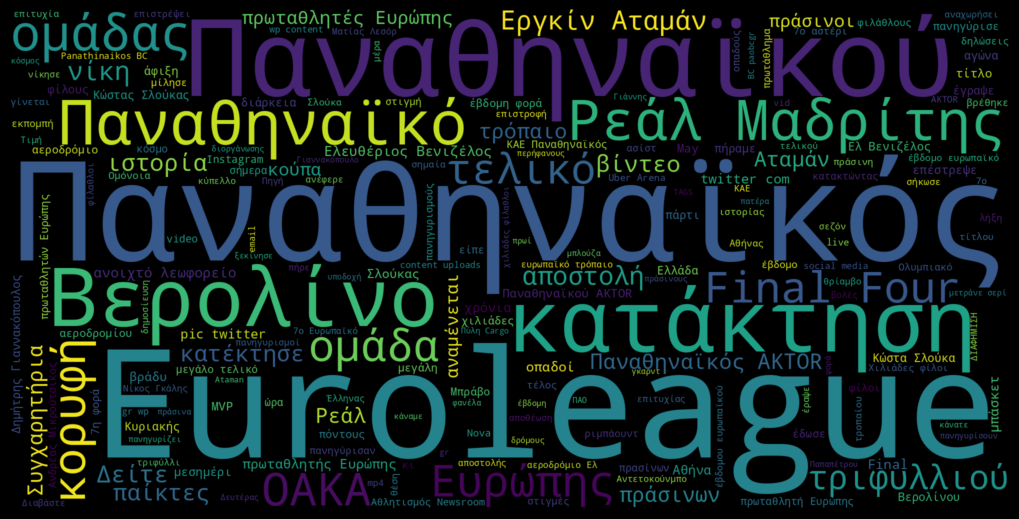

In [ ]:
wordcloud = WordCloud(
     stopwords = nlp.Defaults.stop_words,
     width = 2000,
     height = 1000,
     background_color = 'black'
  ).generate(' '.join(df[(df["source"]=="palo.gr") & (df["day"]==27)]["text"]))
fig = plt.figure(
     figsize = (10, 8),
     facecolor = 'k',
     edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

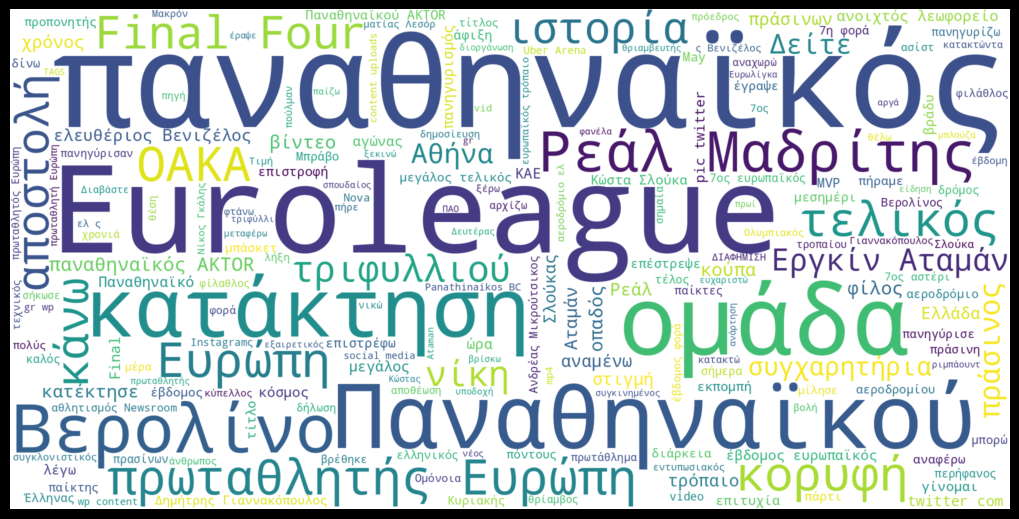

In [ ]:
wordcloud = WordCloud(
     stopwords = nlp.Defaults.stop_words,
     width = 2000,
     height = 1000,
     background_color = 'white'
  ).generate(' '.join(token.lemma_ for token in nlp(' '.join(df[(df["source"]=="palo.gr") & (df["day"]==27)]["text"]))))
fig = plt.figure(
     figsize = (10, 8),
     facecolor = 'k',
     edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
%matplotlib inline
import seaborn as sns

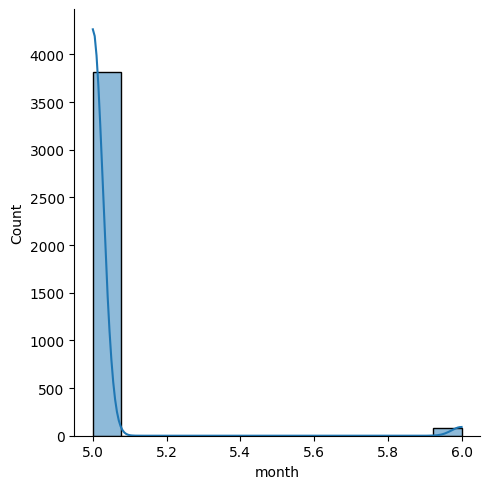

In [ ]:
sns.displot(df['month'],kde=True)

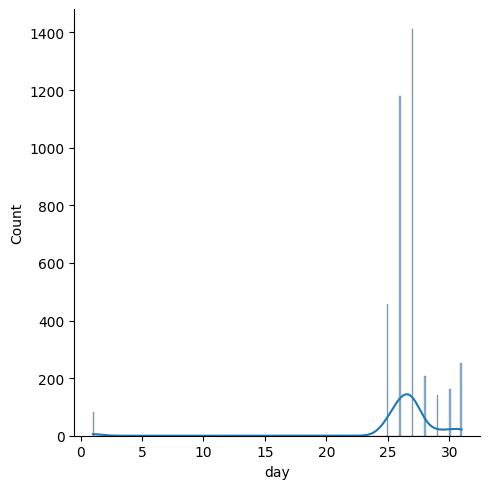

In [ ]:
sns.displot(df['day'],kde=True)

In [ ]:
df['source'].value_counts().head()

source
palo.gr         171
sport24.gr      157
gazzetta.gr     131
sportal.gr      102
paopantou.gr     88
Name: count, dtype: int64

In [ ]:
df["frequency"]=df['source'].value_counts()

<Axes: ylabel='source'>

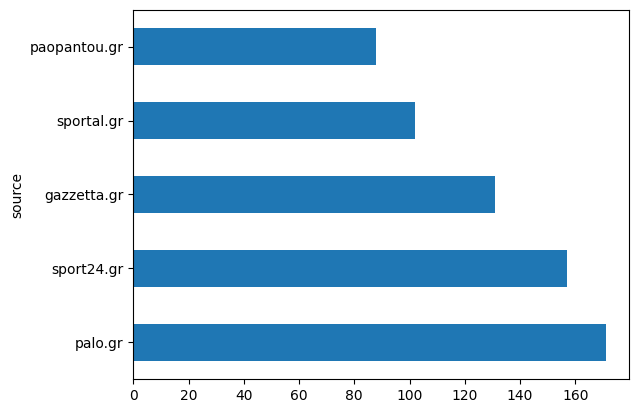

In [ ]:
df['source'].value_counts().head().plot(kind='barh')

In [ ]:
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(3898, 13161)

In [ ]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']

angry_words = emolex_df[emolex_df.Anger == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
sadness_words

27           δευτερα παρουσια
28                   δευτερον
36                   εξαρτηση
62                 κορσικανος
69               λυρικη σκηνη
                 ...         
13123                ελλειπων
13129                 σπαταλω
13144    ανεξελεγκτη πυρκαγια
13147                 αλιμονο
13148           επιδεινωνεται
Name: word, Length: 1328, dtype: object

In [ ]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
3897,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[sadness_words].tail(1)

,αμην,γαμηλιο ταξιδι,διευθυντρια σχολειου,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,κυριε,λιστα ελεγχου,λυρικη σκηνη,...,ηλιακο ωρολογιο,συνεργιστικος,διπλο ποδηλατο,ισαξιος,ανακωχη,αληθης,αναμφιβολως,ανυπερβατος,αναθηματικος,αποδειξη πληρωμης
3897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[sadness_words].sum(axis=1)

0       10
1        1
2        9
3        1
4        1
        ..
3893     2
3894     9
3895     2
3896    10
3897    10
Length: 3898, dtype: int64

In [ ]:
short_df = df[['datetime','text' ]]

In [ ]:
short_df

,datetime,text
0,2024-06-01 23:59:00,Μιλουτίνοφ: «Όταν είσαι στο Final-4 δεν είναι ...
1,2024-06-01 23:54:31,Μπράουν: «Σκοεπύω να μείνω στη Μακάμπι» Σπύρος...
2,2024-06-01 23:43:00,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...
3,2024-06-01 23:19:23,Παναθηναϊκός: Επιτυχία της ΚΑΕ - Πρόλαβε τις.....
4,2024-06-01 23:05:37,ΠΟΙΟΣ ΕΛ ΚΑΑΜΠΙ!!! Το… σήκωσε ο Κούλης – Ποδοσ...
...,...,...
3893,2024-05-25 01:15:50,Αταμάν για τη νίκη του ΠΑΟ επί της Φενέρ: Παίξ...
3894,2024-05-25 01:14:55,Ο Παναθηναϊκός έκανε τη Φενέρ μια χαψιά και ο ...
3895,2024-05-25 01:13:52,Μήτογλου στο Gazzetta: «Μια νίκη για να ολοκλη...
3896,2024-05-25 01:13:23,Μάχη «Τιτάνων» ανάμεσα σε Παναθηναϊκό και Ρεάλ...


In [ ]:
short_df.tail()

,datetime,text
3893,2024-05-25 01:15:50,Αταμάν για τη νίκη του ΠΑΟ επί της Φενέρ: Παίξ...
3894,2024-05-25 01:14:55,Ο Παναθηναϊκός έκανε τη Φενέρ μια χαψιά και ο ...
3895,2024-05-25 01:13:52,Μήτογλου στο Gazzetta: «Μια νίκη για να ολοκλη...
3896,2024-05-25 01:13:23,Μάχη «Τιτάνων» ανάμεσα σε Παναθηναϊκό και Ρεάλ...
3897,2024-05-25 01:13:01,"Φόβος και τρόμος ο Παναθηναϊκός, ρεσιτάλ Αταμά..."


In [ ]:
short_df.head(3)

,datetime,text
0,2024-06-01 23:59:00,Μιλουτίνοφ: «Όταν είσαι στο Final-4 δεν είναι ...
1,2024-06-01 23:54:31,Μπράουν: «Σκοεπύω να μείνω στη Μακάμπι» Σπύρος...
2,2024-06-01 23:43:00,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...


In [ ]:
short_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_df['fear'] = wordcount_df[fear_words].sum(axis=1)

<ipython-input-101-ba535ce3a623>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['anger'] = wordcount_df[angry_words].sum(axis=1)
<ipython-input-101-ba535ce3a623>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['positive'] = wordcount_df[positive_words].sum(axis=1)
<ipython-input-101-ba535ce3a623>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [ ]:
short_df

,datetime,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2024-06-01 23:59:00,Μιλουτίνοφ: «Όταν είσαι στο Final-4 δεν είναι ...,8,8,3,10,2,6,3,10,21,7
1,2024-06-01 23:54:31,Μπράουν: «Σκοεπύω να μείνω στη Μακάμπι» Σπύρος...,3,2,0,1,0,2,1,1,4,2
2,2024-06-01 23:43:00,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,9,11,3,10,1,5,5,9,21,9
3,2024-06-01 23:19:23,Παναθηναϊκός: Επιτυχία της ΚΑΕ - Πρόλαβε τις.....,2,8,6,1,2,7,5,1,7,1
4,2024-06-01 23:05:37,ΠΟΙΟΣ ΕΛ ΚΑΑΜΠΙ!!! Το… σήκωσε ο Κούλης – Ποδοσ...,1,2,0,1,0,4,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3893,2024-05-25 01:15:50,Αταμάν για τη νίκη του ΠΑΟ επί της Φενέρ: Παίξ...,3,10,4,0,1,5,6,2,7,4
3894,2024-05-25 01:14:55,Ο Παναθηναϊκός έκανε τη Φενέρ μια χαψιά και ο ...,6,24,8,2,6,13,16,9,15,11
3895,2024-05-25 01:13:52,Μήτογλου στο Gazzetta: «Μια νίκη για να ολοκλη...,2,8,3,2,2,9,5,2,8,3
3896,2024-05-25 01:13:23,Μάχη «Τιτάνων» ανάμεσα σε Παναθηναϊκό και Ρεάλ...,11,20,8,4,4,11,13,10,24,15


In [ ]:
short_df.reset_index(inplace=True)
short_df.set_index('datetime', inplace=True)
short_df

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
datetime,,,,,,,,,,,,
2024-06-01 23:59:00,0,Μιλουτίνοφ: «Όταν είσαι στο Final-4 δεν είναι ...,8,8,3,10,2,6,3,10,21,7
2024-06-01 23:54:31,1,Μπράουν: «Σκοεπύω να μείνω στη Μακάμπι» Σπύρος...,3,2,0,1,0,2,1,1,4,2
2024-06-01 23:43:00,2,Μιλουτίνοφ: «Συγχαρητήρια στον Παναθηναϊκό για...,9,11,3,10,1,5,5,9,21,9
2024-06-01 23:19:23,3,Παναθηναϊκός: Επιτυχία της ΚΑΕ - Πρόλαβε τις.....,2,8,6,1,2,7,5,1,7,1
2024-06-01 23:05:37,4,ΠΟΙΟΣ ΕΛ ΚΑΑΜΠΙ!!! Το… σήκωσε ο Κούλης – Ποδοσ...,1,2,0,1,0,4,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-25 01:15:50,3893,Αταμάν για τη νίκη του ΠΑΟ επί της Φενέρ: Παίξ...,3,10,4,0,1,5,6,2,7,4
2024-05-25 01:14:55,3894,Ο Παναθηναϊκός έκανε τη Φενέρ μια χαψιά και ο ...,6,24,8,2,6,13,16,9,15,11
2024-05-25 01:13:52,3895,Μήτογλου στο Gazzetta: «Μια νίκη για να ολοκλη...,2,8,3,2,2,9,5,2,8,3


<Axes: xlabel='datetime'>

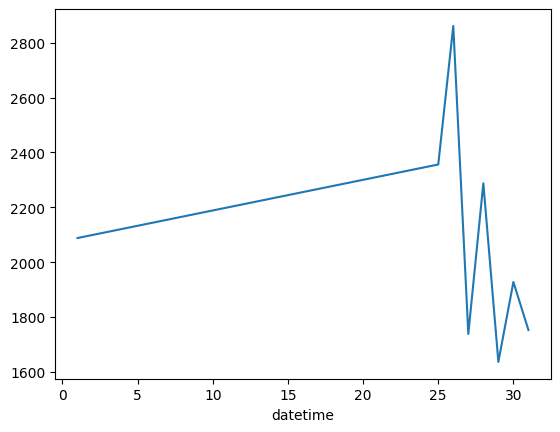

In [ ]:
short_df['text'].str.len().groupby(by=short_df.index.day).mean().plot()

<Axes: xlabel='datetime'>

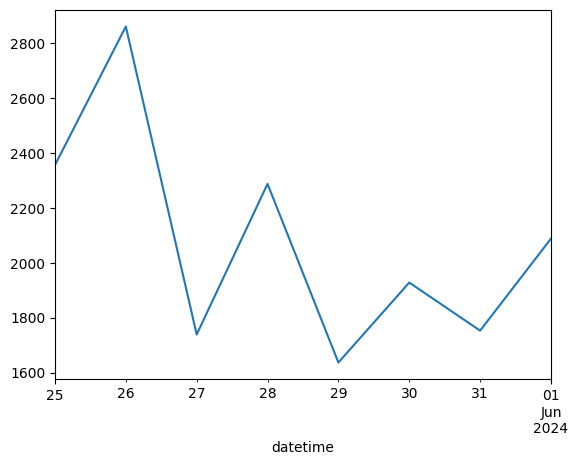

In [ ]:
short_df['text'].str.len().resample('D').mean().plot()

<Axes: ylabel='datetime'>

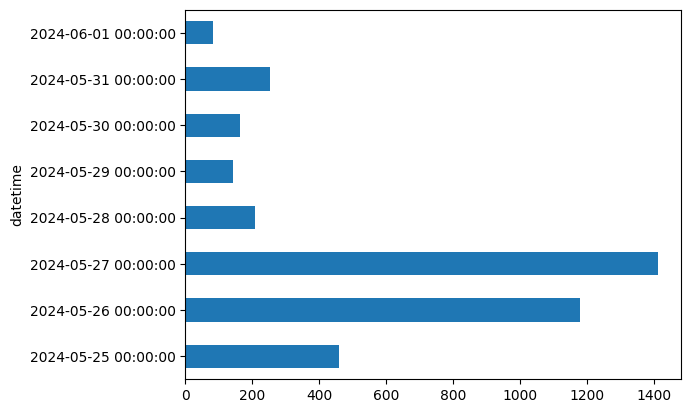

In [ ]:
short_df['text'].resample('D').count().plot(kind='barh')

<Axes: xlabel='datetime'>

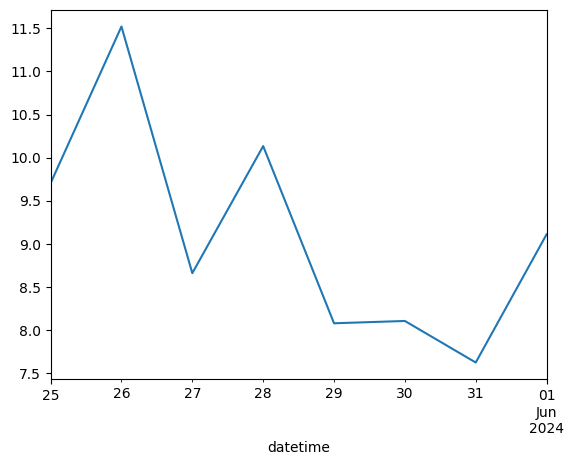

In [ ]:
short_df['positive'].resample('D').mean().plot()

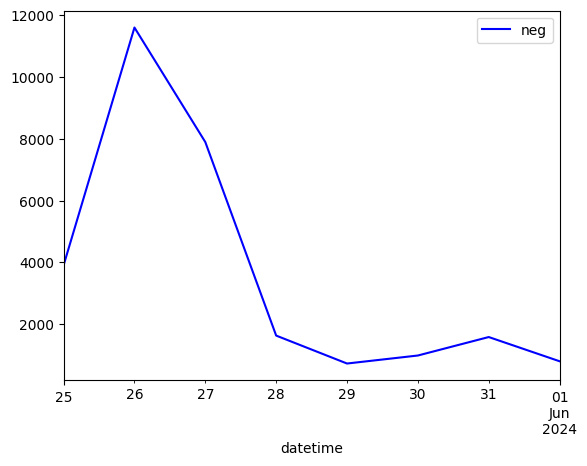

In [ ]:
short_df['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()